In [1]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\kartikay\appdata\local\programs\python\python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Kartikay\\AppData\\Local\\Temp\\pip-install-27ofgfof\\wordcloud_41236eb1ffd842a5ad454ef18e332063\\setup.py'"'"'; __file__='"'"'C:\\Users\\Kartikay\\AppData\\Local\\Temp\\pip-install-27ofgfof\\wordcloud_41236eb1ffd842a5ad454ef18e332063\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Kartikay\AppData\Local\Temp\pip-wheel-z_rkapca'
       cwd: C:\Users\Kartikay\AppData\Local\Temp\pip-install-27ofgfof\wordcloud_41236eb1ffd842a5ad454ef18e332063\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creat

  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


In [2]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
##from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

In [3]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

df = []
conversation = 'Heavy Drivers.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                df.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)



In [4]:
df = pd.DataFrame(df, columns=["date", 'time', 'user', 'message'])
df['date'] = pd.to_datetime(df['date'])
df["time"]=pd.to_datetime(df["time"])

In [5]:
df

,date,time,user,message
0,2020-10-30,2021-12-22 22:35:00,navneet,Vro
1,2020-10-30,2021-12-22 22:36:00,S B 2,vro script yhi h
2,2020-10-30,2021-12-22 22:36:00,S B 2,punjab yeh match haregi
3,2020-10-30,2021-12-22 22:36:00,navneet,Piche ek match me bhi
4,2020-10-30,2021-12-22 22:36:00,S B 2,fir aglajeetegi
...,...,...,...,...
39992,2021-11-20,2021-12-22 14:02:00,S B 2,clg chalke
39993,2021-11-20,2021-12-22 14:02:00,S B 2,<Media omitted>
39994,2021-11-20,2021-12-22 14:02:00,Abhimanyu Kaushik,bhr de bete
39995,2021-11-20,2021-12-22 14:03:00,S B 2,sachme nhi hain vro


<AxesSubplot:>

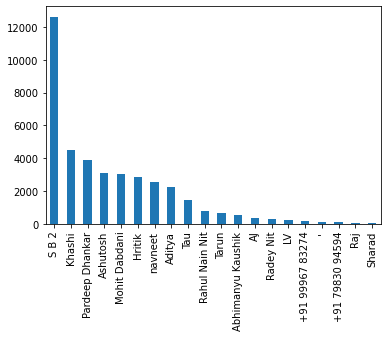

In [6]:
df.user.value_counts().plot(kind='bar')

In [7]:
df["month"]=df.date.dt.month_name()
df["year"]=df.date.dt.year
df["day"]=df.date.dt.day
df["day_name"]=df.date.dt.day_name()
df["hour"]=df.time.dt.hour
df["minute"]=df.time.dt.minute


In [8]:
df

,date,time,user,message,month,year,day,day_name,hour,minute
0,2020-10-30,2021-12-22 22:35:00,navneet,Vro,October,2020,30,Friday,22,35
1,2020-10-30,2021-12-22 22:36:00,S B 2,vro script yhi h,October,2020,30,Friday,22,36
2,2020-10-30,2021-12-22 22:36:00,S B 2,punjab yeh match haregi,October,2020,30,Friday,22,36
3,2020-10-30,2021-12-22 22:36:00,navneet,Piche ek match me bhi,October,2020,30,Friday,22,36
4,2020-10-30,2021-12-22 22:36:00,S B 2,fir aglajeetegi,October,2020,30,Friday,22,36
...,...,...,...,...,...,...,...,...,...,...
39992,2021-11-20,2021-12-22 14:02:00,S B 2,clg chalke,November,2021,20,Saturday,14,2
39993,2021-11-20,2021-12-22 14:02:00,S B 2,<Media omitted>,November,2021,20,Saturday,14,2
39994,2021-11-20,2021-12-22 14:02:00,Abhimanyu Kaushik,bhr de bete,November,2021,20,Saturday,14,2
39995,2021-11-20,2021-12-22 14:03:00,S B 2,sachme nhi hain vro,November,2021,20,Saturday,14,3


In [9]:
df=df.drop(columns=["date"])

In [10]:
df

,time,user,message,month,year,day,day_name,hour,minute
0,2021-12-22 22:35:00,navneet,Vro,October,2020,30,Friday,22,35
1,2021-12-22 22:36:00,S B 2,vro script yhi h,October,2020,30,Friday,22,36
2,2021-12-22 22:36:00,S B 2,punjab yeh match haregi,October,2020,30,Friday,22,36
3,2021-12-22 22:36:00,navneet,Piche ek match me bhi,October,2020,30,Friday,22,36
4,2021-12-22 22:36:00,S B 2,fir aglajeetegi,October,2020,30,Friday,22,36
...,...,...,...,...,...,...,...,...,...
39992,2021-12-22 14:02:00,S B 2,clg chalke,November,2021,20,Saturday,14,2
39993,2021-12-22 14:02:00,S B 2,<Media omitted>,November,2021,20,Saturday,14,2
39994,2021-12-22 14:02:00,Abhimanyu Kaushik,bhr de bete,November,2021,20,Saturday,14,2
39995,2021-12-22 14:03:00,S B 2,sachme nhi hain vro,November,2021,20,Saturday,14,3


In [11]:
df.describe()

,year,day,hour,minute
count,39997.000000,39997.000000,39997.000000,39997.000000
mean,2020.482261,15.938945,16.548616,29.475086
std,0.499691,7.823618,5.624738,17.349581
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,11.000000,13.000000,14.000000
50%,2020.000000,14.000000,19.000000,29.000000
75%,2021.000000,22.000000,21.000000,45.000000
max,2021.000000,31.000000,23.000000,59.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39997 entries, 0 to 39996
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      39997 non-null  datetime64[ns]
 1   user      39644 non-null  object        
 2   message   39997 non-null  object        
 3   month     39997 non-null  object        
 4   year      39997 non-null  int64         
 5   day       39997 non-null  int64         
 6   day_name  39997 non-null  object        
 7   hour      39997 non-null  int64         
 8   minute    39997 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 2.7+ MB


In [13]:
df.shape

(39997, 9)

In [14]:
df.isnull().sum()

time          0
user        353
message       0
month         0
year          0
day           0
day_name      0
hour          0
minute        0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

time        0
user        0
message     0
month       0
year        0
day         0
day_name    0
hour        0
minute      0
dtype: int64

In [17]:
df.shape

(39644, 9)

In [18]:
df.user.unique()

array(['navneet', 'S B 2', 'Pardeep Dhankar', 'Hritik', 'Khashi',
       'Aditya', 'Ashutosh', 'Tarun', 'Mohit Dabdani', 'Rahul Nain Nit',
       'AJ', 'LV', "'", 'Raj', 'Abhimanyu Kaushik', 'Radey Nit',
       '+91 99967 83274', 'Tau', '+91 79830 94594', 'Sharad'],
      dtype=object)

In [19]:
x='+91 99967 83274','+91 79830 94594'
y="Laxman","Bhavi"
df=df.replace(x,y)

In [20]:
df.user.unique()

array(['navneet', 'S B 2', 'Pardeep Dhankar', 'Hritik', 'Khashi',
       'Aditya', 'Ashutosh', 'Tarun', 'Mohit Dabdani', 'Rahul Nain Nit',
       'AJ', 'LV', "'", 'Raj', 'Abhimanyu Kaushik', 'Radey Nit', 'Laxman',
       'Tau', 'Bhavi', 'Sharad'], dtype=object)

In [21]:
df['user'].nunique()

20

In [22]:
## there are 20 member in the group

In [23]:
## Total no of message in the group

In [24]:
df.message.shape

(39644,)

In [25]:
## most active user in the group

In [26]:
df.user.value_counts()

S B 2                12628
Khashi                4520
Pardeep Dhankar       3909
Ashutosh              3110
Mohit Dabdani         3022
Hritik                2852
navneet               2574
Aditya                2232
Tau                   1474
Rahul Nain Nit         765
Tarun                  665
Abhimanyu Kaushik      507
AJ                     351
Radey Nit              316
LV                     226
Laxman                 180
'                      122
Bhavi                  117
Raj                     55
Sharad                  19
Name: user, dtype: int64

Text(0, 0.5, 'No. Of Messages')

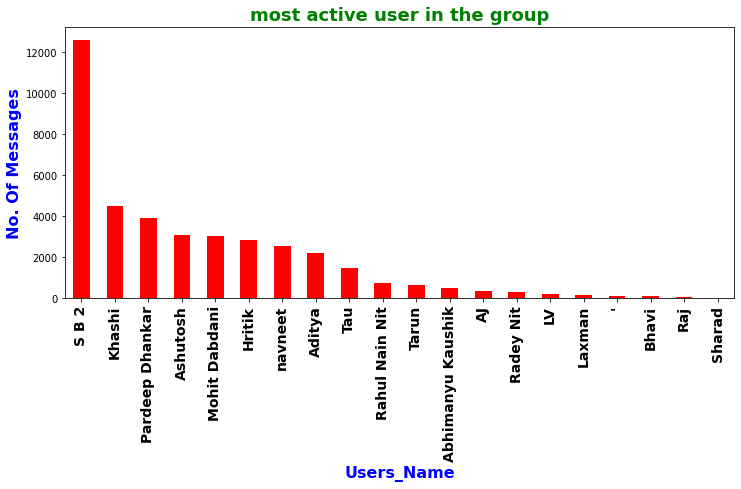

In [27]:
df['user'].value_counts().plot(kind='bar',color='red',figsize=(12,5))
plt.title('most active user in the group',fontsize=18,fontweight='bold',color='green')
plt.xlabel('Users_Name',fontsize=16,fontweight='bold',color='blue')
plt.xticks(fontsize=14,fontweight='bold')
plt.ylabel('No. Of Messages',fontsize=16,fontweight='bold',color='blue')

In [28]:
## No. of Media Sent by group
media_file=df[df['message'] == '<Media omitted>'].shape[0]

In [29]:
media_file

9432

In [30]:
!pip install urlextract

You should consider upgrading via the 'c:\users\kartikay\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [31]:
df=df.reset_index()
df

,index,time,user,message,month,year,day,day_name,hour,minute
0,0,2021-12-22 22:35:00,navneet,Vro,October,2020,30,Friday,22,35
1,1,2021-12-22 22:36:00,S B 2,vro script yhi h,October,2020,30,Friday,22,36
2,2,2021-12-22 22:36:00,S B 2,punjab yeh match haregi,October,2020,30,Friday,22,36
3,3,2021-12-22 22:36:00,navneet,Piche ek match me bhi,October,2020,30,Friday,22,36
4,4,2021-12-22 22:36:00,S B 2,fir aglajeetegi,October,2020,30,Friday,22,36
...,...,...,...,...,...,...,...,...,...,...
39639,39992,2021-12-22 14:02:00,S B 2,clg chalke,November,2021,20,Saturday,14,2
39640,39993,2021-12-22 14:02:00,S B 2,<Media omitted>,November,2021,20,Saturday,14,2
39641,39994,2021-12-22 14:02:00,Abhimanyu Kaushik,bhr de bete,November,2021,20,Saturday,14,2
39642,39995,2021-12-22 14:03:00,S B 2,sachme nhi hain vro,November,2021,20,Saturday,14,3


In [32]:
group_url=[]
from urlextract import URLExtract
extractor = URLExtract()
for i in range(1,len(df['message'])):
    urls = extractor.find_urls(df['message'][i])
    group_url.extend(urls)

In [33]:
group_url

['to.hm',
 'wo.vote',
 'meet.google.com/ccu-fsin-dvx',
 'b.tech',
 'chudwa.li',
 'https://chat.whatsapp.com/Lskovu9smqyDXkE41s0QWe',
 'https://ubr.to/2ROavY9',
 'https://p.paytm.me/xCTH/41f732e4',
 'M.tech',
 'https://dl.flipkart.com/dl/acer-aspire-7-core-i5-9th-gen-8-gb-512-gb-ssd-windows-10-home-4-graphics-nvidia-geforce-gtx-1650-ti-a715-75g-51h8-gaming-laptop/p/itmb6b0ba7ba7c49?pid=COMFR6AAYHTCDHTG&cmpid=product.share.pp',
 't.gi9.in/S8cWm',
 'www.4tube.com',
 'www.8teenxxx.com',
 'www.alotporn.com',
 'www.amateurscentral.com',
 'www.asianscentral.com',
 'www.beeg.com',
 'www.bustnow.com',
 'www.cliphunter.com',
 'www.definebabes.com',
 'www.deviantclip.com',
 'www.drtuber.com',
 'www.empflix.com',
 'www.fantasti.cc',
 'www.fapdu.com',
 'www.freeporn.com',
 'www.freudbox.com',
 'www.fuq.com',
 'www.fux.com',
 'www.grayvee.com',
 'www.hellxx.com',
 'www.hustlertube.com',
 'www.jugy.com',
 'www.jizzhut.com',
 'www.kaktuz.com',
 'www.keezmovies.com',
 'www.kinxxx.com',
 'www.laraporn.c

In [34]:
## Total No. of Words in the group messages

In [35]:
words=[]
for i in df['message'].str.split():
    words.append(i)

In [36]:
len(words)

39644

In [37]:
## most busy day

In [38]:
busy_day=df.groupby(['user','day_name'])['message'].count().reset_index()

In [39]:
busy_day['day_name'].value_counts()

Tuesday      19
Monday       19
Friday       19
Wednesday    19
Thursday     18
Saturday     18
Sunday       18
Name: day_name, dtype: int64

Text(0, 0.5, 'No. Of Messages')

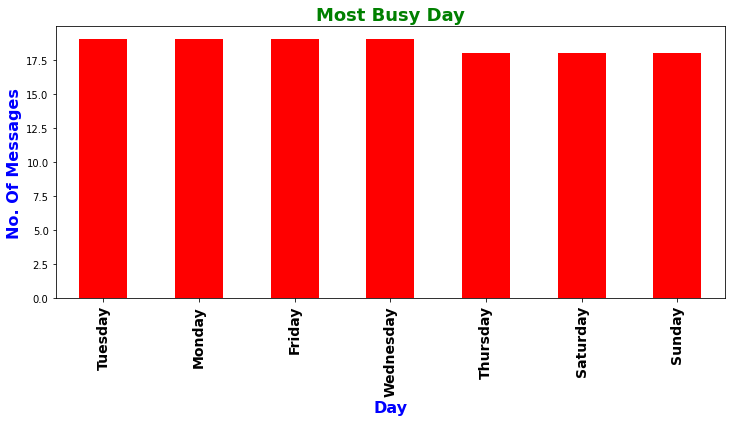

In [40]:
busy_day['day_name'].value_counts().plot(kind='bar',color='red',figsize=(12,5))
plt.title('Most Busy Day',fontsize=18,fontweight='bold',color='green')
plt.xlabel('Day',fontsize=16,fontweight='bold',color='blue')
plt.xticks(fontsize=14,fontweight='bold')
plt.ylabel('No. Of Messages',fontsize=16,fontweight='bold',color='blue')

In [41]:
busy_month=df.groupby(['user','month'])['message'].count().reset_index()

In [42]:
busy_month

,user,month,message
0,',April,14
1,',August,7
2,',December,5
3,',January,4
4,',June,6
...,...,...,...
203,navneet,March,359
204,navneet,May,142
205,navneet,November,352
206,navneet,October,489


In [43]:
busy_month['month'].value_counts()

August       19
November     19
June         18
October      18
April        18
February     17
March        17
January      17
May          17
September    16
July         16
December     16
Name: month, dtype: int64

Text(0, 0.5, 'No. Of Messages')

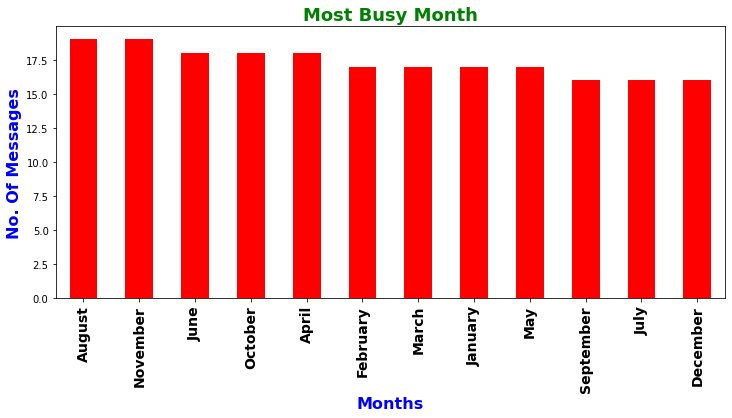

In [44]:
busy_month['month'].value_counts().plot(kind='bar',color='red',figsize=(12,5))
plt.title('Most Busy Month',fontsize=18,fontweight='bold',color='green')
plt.xlabel('Months',fontsize=16,fontweight='bold',color='blue')
plt.xticks(fontsize=14,fontweight='bold')
plt.ylabel('No. Of Messages',fontsize=16,fontweight='bold',color='blue')

In [45]:
busy_year=df.groupby(['user','year'])['message'].count().reset_index()

In [46]:
busy_year.year.value_counts()

2020    18
2021    18
Name: year, dtype: int64

Text(0, 0.5, 'No. Of Messages')

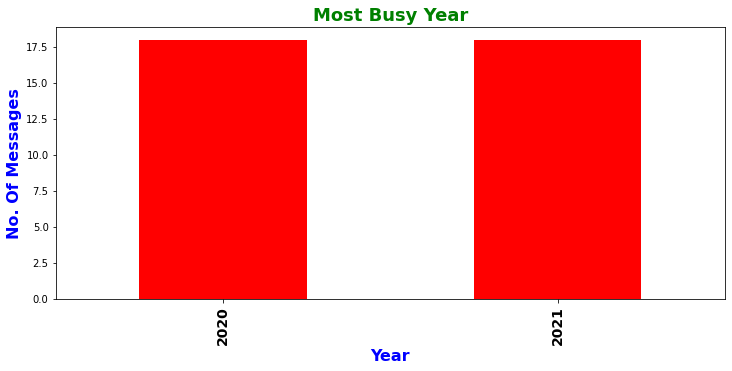

In [47]:
busy_year['year'].value_counts().plot(kind='bar',color='red',figsize=(12,5))
plt.title('Most Busy Year',fontsize=18,fontweight='bold',color='green')
plt.xlabel('Year',fontsize=16,fontweight='bold',color='blue')
plt.xticks(fontsize=14,fontweight='bold')
plt.ylabel('No. Of Messages',fontsize=16,fontweight='bold',color='blue')

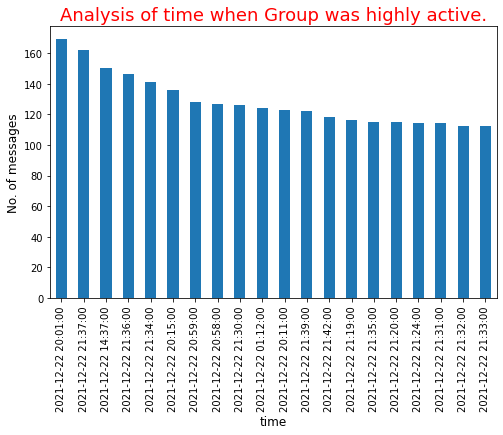

In [48]:
plt.figure(figsize=(8,5))
time= df['time'].value_counts().head(20)
tx = time.plot.bar()
plt.xlabel('time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8,'color' :'red'})
plt.show()

In [49]:
## Analysis of emojis
emojis = []
for message in df['message']:
    emojis.extend([emojis for emojis in message if emojis in emoji.UNICODE_EMOJI['en']])

In [50]:
emojis

['🤭',
 '🤭',
 '🌝',
 '🌝',
 '🤤',
 '🤤',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😭',
 '😭',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😁',
 '😁',
 '😂',
 '😂',
 '😭',
 '😭',
 '😅',
 '😅',
 '😀',
 '😎',
 '😀',
 '🤣',
 '🤣',
 '🌝',
 '🌝',
 '🤟',
 '🌝',
 '🌝',
 '🥳',
 '🥳',
 '😭',
 '🌝',
 '🌝',
 '🤣',
 '🤣',
 '😂',
 '😂',
 '🤣',
 '😀',
 '😀',
 '😎',
 '😂',
 '😂',
 '😂',
 '🎃',
 '🎃',
 '😭',
 '😭',
 '😬',
 '❣',
 '💞',
 '💞',
 '❣',
 '😘',
 '❤',
 '💕',
 '❤',
 '❣',
 '❤',
 '❣',
 '💓',
 '💟',
 '😁',
 '😑',
 '😑',
 '🔥',
 '🔥',
 '🔥',
 '🥺',
 '🥺',
 '😂',
 '🥺',
 '🥺',
 '😂',
 '😂',
 '😁',
 '😁',
 '😂',
 '😁',
 '😁',
 '😬',
 '😬',
 '😔',
 '😔',
 '😔',
 '😬',
 '😬',
 '🥺',
 '🥺',
 '😐',
 '😐',
 '😕',
 '😕',
 '🧐',
 '🧐',
 '😂',
 '❤',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😍',
 '😍',
 '😂',
 '😅',
 '😂',
 '😂',
 '💟',
 '😂',
 '😂',
 '😂',
 '🙄',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '❤',
 '🤣',
 '🤣',
 '😑',
 '🥺',
 '🥺',
 '😁',
 '😁',
 '😁',
 '🥺',
 '😑',
 '😑',
 '😑',
 '😑',
 '😑',
 '🥺',
 '🥺',
 '😑',
 '😑',
 '😑',
 '😑',
 '🤨',
 '🤨',
 '🤨',
 '😬',
 '😬',
 '😑',
 '😑'

In [51]:
## Lets Count the emojis
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [52]:
emoji_df

,0,1
0,😂,1240
1,🥲,914
2,🥺,435
3,🌝,371
4,😑,343
...,...,...
161,🚀,1
162,🚩,1
163,🌞,1
164,🤮,1


In [53]:
emoji_df[1]

0      1240
1       914
2       435
3       371
4       343
       ... 
161       1
162       1
163       1
164       1
165       1
Name: 1, Length: 166, dtype: int64

Text(0.5, 1.0, 'Emojis Analysis')

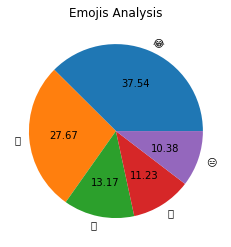

In [54]:
plt.pie(emoji_df[1].head(),labels=emoji_df[0].head(),autopct="%0.2f")
plt.title('Emojis Analysis')

In [55]:
## Most repeating number of words in the messages
text=df[df['message'] != '<Media omitted>']

In [56]:
for i in text['message']:
    print(i)

Vro
vro script yhi h
punjab yeh match haregi
Piche ek match me bhi
fir aglajeetegi
Y ase hi lipar lipat k jeete the
aur last m net runrate se decidehoga
Hyderabad se
ha vro... pr main script matters
us time inhe jitana tha a
*na
taki maza bcha rhe
Fir koi kaha raha tha ki bowling badiya kari hh Slow pitch thi
Asa gyan chod raha tha koi
ye sb ni pta apne ko
H bsdk seen
Karne k baad bhi reply na kar raha
wo wait kr ra h
last m
agr punjab jeetega
to attack krega
Ha vro
Same logic k sath
Ki bowling badiya kari
Priti janta ki najayaj ulad hh wo bhai
Uski life me p word ka bada role hh
Samaz rahe ho na vro
Script change
Hone lagi hh vro
Ban sharabi for 10 days
Kyo vro
Aapki chutiyapo ki vjh se
Script badal rahi hh @919485868926
ha vro
Pitch slow ho rahi hh
🤭🤭
Bowler achi bowling karni start kar di hh
🌝🌝
yhi hota h
ha
mudde ki baat
vro lana rose
🤤🤤
bncho
mne aaj dekhi
mne faisla kr lia h
ghrwali aisi hi launga
ftucopi
chahe
Dekha vro
Bowling kitni achi ho gayi
kitni 1000 lumdia dekhni pden
em

M tyar h
Usme khassi will be suspended for a period of 1 month
Hmm krenge
You can suspend me for 1 year vro
Vrna chup chap guriji ko bna de
Admin
Yes
If u like
Vro guruji less available rehte h
I can do it for u
Koi nahi hm kaam chala lenge
Acha umidwar milte hi m use bna dunga
Nhi full available rhenge
Dikkat mtt le tu
Rahenge to bna denge vro
Guru ji is baat ka haal h
Mujhe transfer krr de
Donara
Tension ku lete ho vro
Dobara
Bhosdike majak chal rha h kya yaha😂
nya admin
ka faisla
ho gya h
AJ
Haan
Semxx
😂😂
yeh aadmi
Bnna jldi
Vaah😂😂
hr rajneeti se door h
Maa chod dega
M teri
Hmm sehmat h
Chale ga
ise pta hi hota
Yaha wife saali saala sb add krne h kya
Full available
ki kya chl ra h
Teri maa ki chut
Koi nahi chalega
Dooglapan mtt dikha
Ekk baat prr rhh le
Bc bas tu nikal yaha se bsdk
mere paas h
ek sol.
sbse jhr
Tune kiye kya
Vro m best hu is post k liye
To ye tere se to kam hh
Nhai karega
Tu layak nhi h
Bolo
New group
ek sim.
1
Vro mne kya kiya
tod de hain
no admin
rndom no. ko bnake

Aggressive nhi khl skta
Ke bc rahane bhi gaya
Lund h dc
Yeh bumpty n maa chudwa rhki h
0-3
😂😂
Isse acha to punjab aa jaati😂
mne mr jana h agr teri bhi stng ho gyi vro
me u tau n jitu
apni union h vro
🤟
wo 2-3 baad ka bol ra tha
Ye bhnchod guu h pant
huehuehue
sbko pta h vro
Haappy Birdaaaay Booooiiiii
Happy Birthday radhey boi
Mere pass nhi aaya
huehuehue
Happy bday 🎂🎈 radhey
yha to aya na vro
meri bhi kha stng h bhau🥺
are bhau sory... bhelcome to the club
🥺🥺
M bhi
lga do
pel do
tm ek no. ke leechad aadmi ho yaar
Saamle saamp
Tm jso n badbaam kr rkha h mjhe
Saaf chavi k insaan ko
ek dum chump rho
ni to nanga kr denge
Dhumil kr rkho h
abhi k abhi
are tup tup tup
ekdum tup
😑😑
.
gndiya mei kainchibde dehi
chala ja yha se
@919050518887
wish kia?
No boii
kr do
Wish you a very very lovely and cheerful Birthday🥳🥳...May the day comeup with beautiful beginning, fresh hopes, bright days, new dreams, lots n lots of new joys and happiness to your life. Be happy like hell n achieve whatever you asp

Tumhari mehrura ki
Nudes chahiye
Jldi
Ftafat
ye rhi
turu lub
.....
bhupinder se contact kijiye
Dimali mubarka baiyo
Hamppy deemwali baaayzzzzz
Happy dipawali brozzzzz
saara n diwali ki bdhayi
😳
Thank u for u r kind wishes
💓
Mst h apun to b krne ka h
*दीपावली आपको मुंह से लेकर पिछवाड़े तक सुख समृधि दे; कोई भोसड़ी का आपकी झाट का बाल ना उखाड़ सके; आप सफलता की ऐसी माँ चोदे; कि सबकी फट जाये; आप पर आने वाले दुखों की बहन चुद जाये; कामयाबी हमेशा आपकी गांड में घुसी रहे। दीपावली की गांड फाड़ बधाई।😎Bhai😝 Ki Taraf Se 😝    अब मत कहना कि बधाई नही दी। 😂😂😂😂😂😂*
🪔✨ *Happy Diwali* ✨🪔  I wish a happy and prosperous Diwali to you and your family. May it is another year blessed with great success stories for you and the light too. Have a wonderful time with your loved ones. Happy Diwali 🤗🪔🪔🪔
Prosperous kya hota h bro
Hlo
ya sexy tau
Farmao dear , lovely, cute , talonted , kind hearted , famous , care taker tauji
Aree yrr khabre aa rhi h ki ppr clg m hoge
December m clg open ho ra h
Gamf fti hui h
Aisa mt bo

Hmne Subu jitni ramdibaazi kbhi nhi ki jitni ye 15 din me kr chuka
Tum kar sakte ho
dekhiye
ye hmara aapsi mamla h
Puri jindgi me nhi ki itni
aur na jis din
Tumhare pass opp . H join karne ki @919521728793
meri ksi ldki k sath
foto click ho jaye
us din
m khud
izzat se leavekr du ga
Ha m karu ga
vro use effort kehte hain... kosis to krega hi aadmi fuddi lene ki
Shubhu or khassi dono ko bahar kar
Kya faayda vro ramdibaaz bhare pde h ab
Okk I will let u in
M hu hi nhi vro
I have to discuss with my members and co-founder tau
shi bamt h
Agar Shubhu hh usme to koi bhi aa sakta hh
Vro lawde ka discussion ek andhe insaan se b pucho to b bta dega
Tumhe pta nhi ku nhi dikh rha vro
@919485868926 ye status hata diya jaye
Yahi hm kehna chahte h vro
ni
Nahi toh m aapko suspension de dunga
mtlb
Ye lo
Nhi hataega
m gareeb kya kru
hm RR hain
iska yeh mtlb ni h
Yashi danda de degi iske
ki hm fuddi leme ki kosis bhi na krenge
aap btao
btao aap
kya hmara laksya
grp. se bahar niklna ni h
Loda kuch nhi dega

Jud gya ab bta bsdk
K share krna h
2 jne jude h ek b sara bhaichara jud jao
Jud jao bhai ek b jruri baat krrni h
bol lodu
3 bhai jud ge h
teri maa ki titi
Ek b sath k sath share to group krte jao
buncho bta de
Bhg maderchod
1 bhai jud k ulta chla gya.....prr koi baat n fer aa jaga
@918930147788 @919485868926 admin bn gye tum log us group k
Ek b jud jao sara bhaichara
Destroy krde kya
bhau 3k message
Konsa group bc
bhai m bhut gir gya🥺🥺
Vo fresher vala
sikh gye vro tm bhi
Ek b jud jao sara bhaichara.....fer m apni baat khu
🔥🔥
🌝🌝
o raand
Haa tn bhi bna diya
kal krte h aaram se
aaj kaam hvro
Ebbi dekha h mne
ab keh do
ni yeh bhaichara chla jayega
To bhaiyo baat h mere aatmsamman p hrr roj pachle koi 2 mhina t chot maran ki
jitna judya h
ja
ja
chla ja
hme
koi nautanki ni dekhni
ful spot ni hai
yo s bhi k tere
M nu khna chahu su ak m bhai kti pure virgin hu aajtk phli baat
😬😬
are oo ramd
mera dimaag na khraab kr
Arr 2sri baat m kite apna taka fir krn ki kosis kru to ude m ulti sidhi jgh tag

ek baar dila do
hostel wapis
Mt bhejo
Bhauu
Pmlzz
mjhe pta tha
Nhi bhejna bsdk
Aj ne kl bheji
pr mne socha
Rula diya
meri gand royi h
to sbki roni chahiye
Hm gp chhodenge ya tereko fekenge
ko ni
Agr aisi chinaal hrqt ki to
m dm kr dunga
Tu apni saadi ki bta
Going to block u
email kr dunga
Phone tod rha hunn lawde
Tu gaan hi marle meri
Prank tha guruji
Bhompriko saadi hone vali h
Tu uski maarna
Sbb juth h
Bhaiyo
Aaj ek baat bta rha hunn
*Subu ki kisi bhi baat ka vishwas mtt kiya kro*
Faiyde m rhoge
Isne hmme hmare hrr safar ke hrr modd prr juth bola h
To vo virgin vaali baat ka kya Krna h tauji
Sbb juth h
M bol rha hunn
bncho
tau
aaj tm yeh kr re ho mee sath
are tm video dekho fraans
Maa chuda maa chuda
++♾️
are fraaans
yaad aaye din
🙂🙂
OMG boiis
Vo din bhi kya din the
WE were crazy back then
Life ji to tbh rhe the
Abb to kat rhe h
ye to kuch bhi ni
itni jld ft gya aap logo ka
Are bhejho bhau
abhi to bhut kuch h mere paas
Full on asla
m thodi si tatti kr leta hu
I want to relive
fir aaj

Pii k
Nhi bhaiya
Dimaag bhasad hua pda
Hai
Bhai ka biah h
Apne ghar kya shaadi bc
Ganja fukk
Kaam krte rho
Darru pi le
Fir dekhiye
Tu krwawega kaam
Tere bhai t
++++++
++++++
++++
neech pro
++++++
Ye aa gya rempist
Sbse bda vala
tjhse bda koi ni h vro
sbko pta h
Rhne de tu bsdk
Geet☑️ Yashi ☑️ IITD vali☑️
Wah vro apna to batya nhi apne
Vo jiske liye aap pit k aaye the
🙂
Pooja☑️ Gaurika☑️ Nishu ☑️
🙂✌🏻
😬
Mujhe nhi khelna ye khel
🙂
Bhabhiji
🤭🤭
🙂🥰
To iske baap ko bhej du ye photo
@919485868926 please like comment share
Vro apna peene ka or naachne ka kaam ho jayega🙂✌🏻
Bsdk iska baap kya bhai bharat bol😬
Ase hi status fekte ho vro uske ek msg aate hi
kuch bhi ilzaamat
wahiyat
bebuniyaad
😑😑
2-3 din ruk jao vro
Bhabhiji nayi post dalne vali hi hongi
Bsdk saara youtube tiktok se bhr rakha h🤦🏻‍♂️, saara din yhi pelta rhta h kya
Bsdk tune like comment share ki bhabhi ki video
Bakchodi kr rha h yaha @919485868926 naraj ho jaega bhai😬😬
Abhi jata hu bro
sabas
Sabar kro neeche ka or padho abhi
🙂
🥺🥺
2

Vro
Ye bumty k sath acha nhi kiya tumne
Ye rapist bsdka randirona krke biasing krata h hamesa
Bumty aur m fas jaate h
Hm randirona nhi krte to kya hm galat
I openly support bumty
Tu apne aap se bumty ko admin kaise bana sakta h
U have no authority for appointment of new admin
U should step down and let people decide
But I can suggest and no one was online that time
U and bumty will have to serve suspension for breaking the rules
So by voting I gave Power to him
Konse rules vro
U have to wait for that it's an important issue for this grp
bhai yeh rempist
Jab kisi ko bhi nahi nikal sakte grp se
Ye decide hua tha
Last tym
abe rehne de bsdk
We want new admin
tm dono ne
Ha to vro mne step down kiya us glti k liye
Mil gya naya admin
Bumty
Ek msg daala hota hh ki
Chup maderchod ekdum chup
Voting ho rahi hh
mere khilaaf
Nahi disapproved
Or time daalna hota hh 10 min
Now we have 2 candidate tau and bumty
Or sabko tag karna bhi hota hh
For ner admin let's openly vote now
Sbko tag kiya Subu ne
bo

Kitne q puch rkhe h 🥺 Itne to sessional me hi ni puchte
Vhi to....maa chod k rkh di h farm ki ful
h kis chiz ka ye to bta?
Bc kholke dekh le
Aaahhh
@919468374687 @918396074318
Bhenchod 5 logo me hi competition h bs tau😂
Usme se m to bahr ho jaunga
Saalo tham mechanical si bhar deta to mst bakchodi krta chandigarh me
mere hisab se sbko legi ye
tbhi itne documents maang rhi h
or 2 ko bhi legi to tumhara. to pkka h
Interview hoga
Jisme gand mregi
5 logo me hi?😂
Meri kismat to lund h
7th no mera tya
Tha
Gmda m
are hme wisbas h tum per tum usko faad doge
Mujhe khud ko nhi h prr
per hme to h na
tu bs hm per wisbas rkh
tujhe khud per apne aap ho jayega
Sayad aaj raat tk bhr skte h
kya ho ra h ye
mjhe bhi bta do
😬
Jo hua ache ke liye hua
🤨🤨
kya hua h
Drdo
Sayad
m eligible hi ni hounga
Enn lomdo ka drdo ho gya😂😂
Final nhi h abhi
Ho jayga
Are  civil m top tum dono ki h cgpa kyu nahi hoga
Abb bhrosa nhi rha
Mast party ki tyari karo
Lawde
Lab hh drdo ki
Bdi jgh nhi h
GMDA thodi h vro ye
Gamdu
Aur 

Bc mere aur tau jaiso k samne
Bhai jalane aa rha h tumko
Jaan bhujke planning krke
🥲🥲
🥲🥲
Bae ki I’d Dede bas
Arey oo Maderchod
Ye bakchodi mt kr bsdk😂
2 din se tu merko pass reset k mail bhej rha h bsdk
Bsdk maza aa gya
😂
Ab iski rdibaazi check kar
Jalta h saala mujhse
Na maine abhi try kiya h
Insta pe vse b kuch nhi milega mere😁
Krna hi tha to ramdibaaz rempist Subu ka krta insta to
Bae ki I’d dedo bas
Chala ja bsdk😂
Bsdk surgical strike kar dega tere ghar par
Aantakwadi bol kar
biro ek baar... bas ek baar ek din k liye mjhe access de dena mjhe
mera to password hi le lo biro
🥲🥲
This message was deleted
La de bsdk de th
aaja aaja
Or ye khassi ki gamd fmti
chudwa li maa
Mamderchod
😅😅
syaani ktiya
*kutiya
pel di
schme pel di?
Arey bhen k lode guruji maan ja Maderchod
gurji tm sanghars kro
ham tmare sath hain
anyone up for a new year party or something
🥲
Tera baap to ghar ya farmhouse pe organize kra rha hoga
kyu sunne k kam kr ra h
🥲
🥲🥲
choot dila do fraans
plmz
ek baar dila do
@91905051

falladbaazi
statusbaazi bhaiya ji
stats bhi better hone wale hain kohli se
udwa diya
@918396074318 dekh ra h msg
pr bol ni ra
bachne ka wait kr ra h betichod
bach gya
bochlika
aaj to centuri bhaiya ji
Arey tu chutiya h kya bsdk
👶👶👶
bhaiya
aag lga diye aaj to
mr gya madarchod
🥲🥲
bancho not out tha
pel dia lomda
isan kisan ne jhad ful kri h
🥲🥲
pandya muchi bnd
Shardul new all-rounder hh
Pandiya chumtiya ho liya
Bhar karo bhar karo pandya chutiya ko bhar karo
Aree nhi ....ek ball fs gyi thi
Pichle 4 match se same chutiyapa kr rha h
Ditto same
Asa bhi nhi h ki agle match m us chij ko improve kr k aa rha ho
bowler se kho 5-10 km slow kre
technique apne aap sudhar jyegi
Khi khi khi....maa chod diye radhey bhaiya......or lenth ball bhi dalo....jisko ful gand ka jor lga k bhaiya pel ske
apne ko ambani ka support maagta hai
Bhenchod 2no decision m INDIA ki bhund mari h aaj
Ye to saaf touch kr rha tha boundary ko
bilkul
Or malan n to dhang se ball ragad di thi jameen m
test wala umpire achhaaa t

Pfizer b aane vali h india me
Soch rha hu wait hi krlu
Gandu tere narnaul m toh bilkul bhi nahi aayegi
Tune konsi lgvayi
Uske liye -70 degree p storage karna padta h
Covishield hi thi yaha par
mhngi hogi wo to
govt. mushqil bantegi free m
Free hi denge yaar
Agar mokka milega toh covaxin lagwana
abhi komsi lga rhe hain?
Dono lag rahi har jagah alag h
Haa vo is variant ko b cover kr rhi h
Guys need money
If someone could give me loan
I will be thankfull
I have just 80
Rupees
I have just 1000
If u want
I will be in touch if I need
Tomorrow
Indeed
How much
How much you can?
That much
Bhemchod asa kya krna h
I have to take a laptop
N u think that amount can be arranged with these small loans
I have 50 k
Soon I'm gonna die .....sell my both kidneys.....nd buy laptop
Boond boond se sagar bharta h
If you want to lent me money
Then it's okay
Fuck you
Otherwise get lost
I can give 2500
Thanks
For your contribution
Get lost bimtch
If u wait for few days u can get my both kidneys
how much boi
boi 

Bhai sahab gaazab senti hoke bola isne ye
Teri gaand phaad dunga bsdk jhooth mt bol ab
Bhai sachai h ye baatien
Aya ma
Kaha tha mane
Aaradhya ki hi kha le
Thik hh Aradhya ki kasam nhai bola
Mane asa kuch
Kisi kasaam Khani hh ye. Meta
Bta na bsdk
Bta na mc @917983094594
Mt kha bhai tu bsdk aadhi duniya maar dega ese
.
This message was deleted
Earphone alert
Bhinay seoran utube channel
N most hilarious thing is
It's a study channel
Bhinay is the teacher
Guru classes
And you subscribed it
Kya bklndiii h ye
🌝🌝
hila bsdk
jake
Wah chutiye wah
Isse mera khda nhi hua tu hilane ki kh rha h
Alison tyler k niche to sonu p kisi chij ka effect ich nhi hota
Hamara bunty to khada ho gya
Tau to mst marod aaya bunty ko
Tere shok to Homework wala h Tera kanh khda hoga
Hdd gaandu h guruji 2 year mtlb jb tu clg ki second year me tha lode
Nearly 4 sem to nikale h
1.75 approx
To round figure 1.5 hi krega 2.5 kis hisab se kr rha h
2*
2.5 saal k baad apan 3rd year me honge na guruji
Please guruji bnd kro ye g

Ya drive upload
@919485868926 check ur snapcaht
🥳🥳
ishnep pe bhej do bhau
jamldi se
🔥🔥🔥
jehad
send me too
Abe yha bhi bhejo
Guruji
unli snap
m bhejta hu
Okkiii
piliz
save to camera roll kr lena ka
5 min. m del. kr deni h
bilkul riks ni lene ka
Ok
aa reli h
Nye IT rules isiliye leke to aa re h ye
Kuch bhi share krne se phle scan mar denge mst
🥲🥲
desi pirns
bnd ho jayengi
Aayi nhi abhi tk
Gurujii
Drive pe daalke
Kuch idiyo ko exces
Dede
🥲🥲🥲
Aaj sare muthi marege mst ful omn
ishnep
is bemst
Subu marenge*
Bhej na lodu
Bc snap h hi na
Teri maa ki chut bhej de bc
+1
Excitement dkh rhe ho londo ki
contact gurumji
Aree oo bhenchod
Bhej de
Saare online aa liye 5 min me
for others apps
Drive pe daal le bc subu
Tu saale snap p bhej de
need
10 min ghaaiz
hila aata hu phle
Snapchat share pe koi dikkat nhi aati?
nhi
bs dlt kr dena
server se saaf ho jati h
Aree yr ye to btao ye itni ispesal kyu j
H
Kya khash h isme
Hlooo ghaizzz
Hlo hlo
Bhejta hu rumko
Gaayz mujhe asa lag rha h ye dono milke hme chut

Sex toy le aao tum mst
Din raat hudai kro
bancho
muchiya hi lenge
sex toy to
bhumt mehnge hain
Ohhhhhh
Kya h bc
tm rehne do
tm ppt bnao
🤣🤣🤣
Tum punu
Ko
Amul ki phnayo
ye buchara msg pdh ra h upr k
Chle ja beham ke lomde
bht bura hua @919896528748 ke sath
yeh saare msg line se pdh ra h
Yess
ragni mei bhi
hoddam pamti ni thi
🥺🥺
dhomkha
Ye chutiya sch n 1000 msg line se pdh rha h
Arrey bhomsdiko
Abhi baad meun realise hua
Or isko lg rha h ye unke remply 2 min m de dega
ashu je samth
Kitne msg kr rkhe h
rehta tha
na
yeh
Sed life
6 mhine
Mtlb kuch bhi
Gaamdu
gro kholte time
ek no. hota h
vro
wo dekh lia kro
@919896528748 bhaiya...  Msg pdho na
Reply dete rho
vro tmhe is ghnte ki dihadi ni mili
Sorry bhaiya
booking
Glti hi gyi
are bncho
tmne to last tk
pdhe ni msg
ab tmhe
bokimg
ki baamt bhi smjh ni aayegi
Ok bye
booking mil gyi
lgta h
Bahut mzaa aaya vro jo tumne line se phle 3 msg pdh k unke reply de kr process ko quit kiya
me too
aur last mei
fun part ko mims kr dia
m to keh rha hu @91989

Smaj dekhna chahta h iski rmdibaazi
Gumji tum to kati hi zher kaam kiye ho🔥
Asa kisi ne nhi kata hoga 😂
maa chudane gya ashu ka concent bc
Tum to rhne hi do
Aree bc same words...ditto ek dm
.
guruji bhejo bc
Gumruji taking ful omn celebrity's feeml
Are kuch bhi kro lo hme ghnta frk ni  pr jiski wjh se sachi ke pass gya
Kuch
Wo fr aapni dekh lena
Baki kuch bhi kro
.
Wah beta....ye tum Milne jane se phle kahe nhi soche
Hehehe boii🥲🥲
Wah bete
Boii aap to single bta rhe the
Bilkul
Kyu ni
Btayege
Chut dega koi to
Aree iski maa ki....kya baatm kr rha h gumruji....sachi ase bola ye madharchod
Vol re the ladkiya hi ni h clg me
Kanh h
Aree bc ashu to kti ful dimag ko gode k niche de k chamt kiya h
Pdho pdho
Bhaiyo
Lo moz
Sachi bhabhi ko bhi mamle se avgat kraya jaye
Mjhe asa lgta h
Gand tod di jayegi
Mere hath se chut gyi to
Agr hmm muchi maar rhe h to tum bhi muchi hi maroge bc...akele akele hoot lena is not fair
jebby issi sticker me apna dard byaan krr rha h
++
Aree ek bat or
Ye chat ni hoti

Btw guyz are u missing scripted ipl?
Fuck off
Kya mast match chal raha h
Pr wo in test match se achhe the
Gaeezz tmne smjha nhi mera mtlb.....m khna chahta tha ki script chl to rhi h mst....to miss kyo krege
Okay
smxxyy boii
@917042473345
Congratulations @917042473345
hihihihihih
🥳🥳
Thanks guyzz
Thak gya tha paper dete hue
Congratulations @917042473345 🥳🥳🥳🕺
Congrats boii
Gaan waan fad di tune to
🥳🥳🥳
Congrats bhoiii🥳🥳🥳🥳🥳
Congratulations boii
Congo boi
ye kaisa sooka sooka celibresan h
bhere is nangi futu
@917042473345 boi
apni ek nangi tasveer bhej do
mere paas h nahi, aur sayad kisi k paas ni hogi
Radhey at 4AM
Nangi tasveer de gumruji
Nangi ka mtlb hota h gamd ki tasveer
@917042473345 .... apni gamd ki tasveer khich k bheh
@917042473345 boii kheech k bhej de viro
We are bheting modafuka
Kha gamd mrva riya h bhochlike
No remply
From @917042473345
🥲🥲🥲
nope bhau
ask from poonam bhabhi
Bhochlike
Bhat the phakkk
wah sardaar... gamd faad di hutiye ki
congratulations radhe boi🎉🎉
Kon hh
Ye
ko

bhanu ko to
whi ptk ke hod dunga
Moti gand h mja aayega
delete kr dia hai
kisi ko pta ni chlna chahiye
maza aayega
This message was deleted
@919306256287
noi toi
onli 3 views
delete one message
jisme dikh rha h
Done bhii
Yeh rana bhut bda lemdi ho gya h
Chup bsdk
Isse ladki bnn ne ka bhut shonk h
Bna de subu ek baar ko
mera bas chale
to 5-6 ko bnake
ful omn
maze le lun
🌝🌝😂
Dekh rhe ho @918396074318  isko
are ful omn repisht h khamsi
Guys
Plagrism ko remove krne ko bdiya site btao
Bhosidke
Bta de na
Ruk
Yes
Are spinbot likh de uspe dal de paragraph kar ke
Kam ho jata h lagbhag
Arre vo change krr deti h
Warna khud hi karna padta h
Yaha pe text daalega aur paraphrase pe click krega toh text alag ho jaayega
Quilbot bhi h ek, bt maine kbhi try ni ki h
@919485868926
Ooye
Ghdi mil ri bc
Wahi teri 14k wali
2 se 5 m
@919485868926
Ooyyeeeee
kha pe
dikhaiyo
🧐🧐
@917082466353
Le
Kya le
mai bhi 60 sec
se yhi soch rha hu
Are ruk
bhago bhago
komedian aaya
😂😂
health centre ki email id mil jayegi kya
ya

In [57]:
##word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text['Message'].str.cat(sep=" "))

In [58]:
##plt.figure(figsize=(12,7))
##plt.imshow(word_cloud, interpolation='bilinear')
##plt.axis("off")
##plt.show()


## Sentiment analyis

In [60]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kartikay\AppData\Roaming\nltk_data...


True

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
df["positive"]=[sentiments.polarity_scores(i)["pos"] for i in df["message"]]
df["negative"]=[sentiments.polarity_scores(i)["neg"] for i in df["message"]]
df["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in df["message"]]

In [65]:
df.head()

,index,time,user,message,month,year,day,day_name,hour,minute,positive,negative,neutral
0,0,2021-12-22 22:35:00,navneet,Vro,October,2020,30,Friday,22,35,0.0,0.0,1.0
1,1,2021-12-22 22:36:00,S B 2,vro script yhi h,October,2020,30,Friday,22,36,0.0,0.0,1.0
2,2,2021-12-22 22:36:00,S B 2,punjab yeh match haregi,October,2020,30,Friday,22,36,0.0,0.0,1.0
3,3,2021-12-22 22:36:00,navneet,Piche ek match me bhi,October,2020,30,Friday,22,36,0.0,0.0,1.0
4,4,2021-12-22 22:36:00,S B 2,fir aglajeetegi,October,2020,30,Friday,22,36,0.0,0.0,1.0


In [66]:
x=sum(df["positive"])
y=sum(df["negative"])
z=sum(df["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutral")

score(x,y,z)

Neutral


In [69]:
df['Sentiment']=df['positive']+df['negative']+df['neutral']

In [71]:
df_Sentiment = df[['user','positive','negative','neutral']]

In [73]:
df_Sentiment.head(50)

,user,positive,negative,neutral
0,navneet,0.000,0.000,1.000
1,S B 2,0.000,0.000,1.000
2,S B 2,0.000,0.000,1.000
3,navneet,0.000,0.000,1.000
4,S B 2,0.000,0.000,1.000
5,navneet,0.000,0.000,1.000
6,S B 2,0.000,0.000,1.000
7,navneet,0.000,0.000,1.000
8,S B 2,0.467,0.000,0.533
9,S B 2,0.000,0.000,1.000


In [76]:
df.message.head(32)

0                                                   Vro
1                                      vro script yhi h
2                               punjab yeh match haregi
3                                 Piche ek match me bhi
4                                       fir aglajeetegi
5                      Y ase hi lipar lipat k jeete the
6                  aur last m net runrate se decidehoga
7                                          Hyderabad se
8                      ha vro... pr main script matters
9                             us time inhe jitana tha a
10                                                  *na
11                                   taki maza bcha rhe
12    Fir koi kaha raha tha ki bowling badiya kari h...
13                           Asa gyan chod raha tha koi
14                                      <Media omitted>
15                                 ye sb ni pta apne ko
16                                          H bsdk seen
17                   Karne k baad bhi reply na k